<h1><strong><u>MLP Test</u></strong></h1>

In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV, RandomizedSearchCV, validation_curve
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, CategoricalNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
import spacy

<h2><u>Data Loading</u></h2>

In [2]:
df = pd.DataFrame(columns=["title", "target"])

In [3]:
# Formatting text files
titles = []
targets = []
file_path_dict = {'clickbait': './clickbait_data.txt', 'non clickbait': './non_clickbait_data.txt'}
for key, value in file_path_dict.items():
    with open(value, 'r') as file:
        for line_number, line in enumerate(file):
            line = line.strip()
            if line != "":
                titles.append(line)
                targets.append(key)
data_dict = {"title": titles, "target": targets}
df = pd.DataFrame(data_dict)


In [4]:
data = df.sample(frac=1, random_state=42).reset_index(drop=True)
display(data)

,title,target
0,Filipino activist arrested for disrupting Mani...,non clickbait
1,"International Board fixes soccer field size, h...",non clickbait
2,24 Rules For Women On A First Date With A Man,clickbait
3,Political fallout from the sacking of Professo...,non clickbait
4,"Which ""Clueless"" Character Are You Based On Yo...",clickbait
...,...,...
31995,Rocket strike near hotel in Afghan capital inj...,non clickbait
31996,How Well Do You Remember The First Episode Of ...,clickbait
31997,16 Photos From The Delhi Queer Pride Parade Th...,clickbait
31998,33 Of The Most Canadian Sentences Ever,clickbait


In [ ]:
X = data["title"]
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
display(X_train.shape) 
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(25600,)

(6400,)

(25600,)

(6400,)

In [6]:
def custom_tokenizer(text):
        from nltk.tokenize import word_tokenize
        from nltk.corpus import stopwords
        from nltk.stem import WordNetLemmatizer
        import re
        en_stopwords = stopwords.words('english')
        lemmatizer = WordNetLemmatizer()
        new_text = text.lower() #lowercase

        new_text = re.sub(r"([^\w\s])", "", new_text) #remove punctuation

        for word in new_text.split(): #remove stopwords
            if word in en_stopwords:
                new_text = new_text.replace(word, "")
        
        new_text = word_tokenize(new_text) #tokenize

        new_text = [lemmatizer.lemmatize(token) for token in new_text] #lemmatize
        return new_text

<h2><strong><u>MLP Model Selection</u></strong></h2>

<h3><strong><u>Validation Curves</u></strong></h3>

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END ......clf__alpha=1;, score=(train=0.954, test=0.936) total time=  36.1s
[CV] END .clf__alpha=0.0001;, score=(train=1.000, test=0.951) total time=  40.1s
[CV] END .clf__alpha=0.0001;, score=(train=1.000, test=0.950) total time=  40.0s
[CV] END ..clf__alpha=0.001;, score=(train=1.000, test=0.946) total time=  56.0s
[CV] END ....clf__alpha=0.1;, score=(train=0.999, test=0.952) total time=  58.3s
[CV] END ..clf__alpha=0.001;, score=(train=1.000, test=0.947) total time=  59.2s
[CV] END ...clf__alpha=0.01;, score=(train=1.000, test=0.948) total time= 1.1min
[CV] END ...clf__alpha=0.01;, score=(train=1.000, test=0.948) total time= 1.1min


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  1.2min remaining:  2.5min


[CV] END .clf__alpha=0.0001;, score=(train=1.000, test=0.947) total time=  35.9s
[CV] END ......clf__alpha=1;, score=(train=0.957, test=0.943) total time=  36.3s
[CV] END ....clf__alpha=0.1;, score=(train=0.999, test=0.953) total time=  52.3s
[CV] END ......clf__alpha=1;, score=(train=0.959, test=0.938) total time=  28.6s
[CV] END .clf__alpha=0.0001;, score=(train=1.000, test=0.956) total time=  33.5s
[CV] END ..clf__alpha=0.001;, score=(train=1.000, test=0.946) total time=  49.1s
[CV] END ....clf__alpha=0.1;, score=(train=0.999, test=0.951) total time=  48.8s
[CV] END ...clf__alpha=0.01;, score=(train=1.000, test=0.948) total time= 1.1min
[CV] END ......clf__alpha=1;, score=(train=0.957, test=0.935) total time=  34.4s


[Parallel(n_jobs=-1)]: Done  17 out of  25 | elapsed:  2.3min remaining:  1.1min


[CV] END ..clf__alpha=0.001;, score=(train=1.000, test=0.949) total time=  54.8s
[CV] END .clf__alpha=0.0001;, score=(train=1.000, test=0.953) total time=  32.6s
[CV] END ....clf__alpha=0.1;, score=(train=0.999, test=0.954) total time=  47.6s
[CV] END ...clf__alpha=0.01;, score=(train=1.000, test=0.951) total time= 1.0min
[CV] END ..clf__alpha=0.001;, score=(train=1.000, test=0.949) total time=  40.9s
[CV] END ......clf__alpha=1;, score=(train=0.957, test=0.934) total time=  17.3s
[CV] END ...clf__alpha=0.01;, score=(train=1.000, test=0.950) total time=  41.6s
[CV] END ....clf__alpha=0.1;, score=(train=0.999, test=0.955) total time=  30.3s


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.7min finished


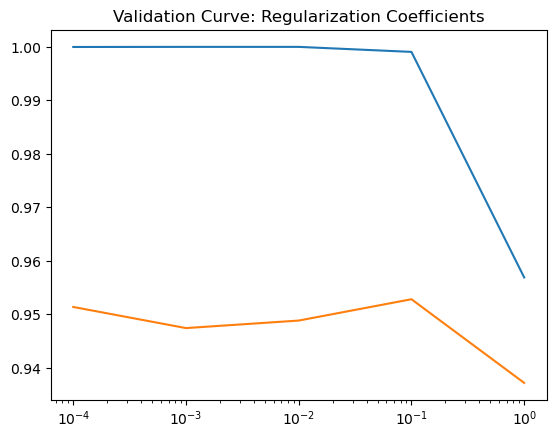

In [7]:
# Validation Curve for Testing Regularization Coefficient Ranges

pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)),
        ("clf", MLPClassifier(hidden_layer_sizes=(10,))),
    ]
)
alphas = [0.0001, 0.001, 0.01, 0.1, 1]
train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__alpha",
                                                   param_range=alphas,
                                                   verbose=3,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.title("Validation Curve: Regularization Coefficients")
plt.semilogx(alphas, train_scores_mean)
plt.semilogx(alphas, validation_scores_mean)

<h4><u>Findings From 'Regularization Coefficient Ranges' Validation Curve</u></h4>
From 0.1 to 1, the plot shows the starting point of the convergence of the training and the validation scores. Their convergence can point to the regularization coefficient that promotes the most generalized model. I will test further by shifting and expanding the range to 1-10.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END ......clf__alpha=6;, score=(train=0.500, test=0.500) total time=  14.3s
[CV] END ......clf__alpha=5;, score=(train=0.500, test=0.500) total time=  14.8s
[CV] END ......clf__alpha=7;, score=(train=0.500, test=0.500) total time=  15.2s
[CV] END ......clf__alpha=8;, score=(train=0.500, test=0.500) total time=  17.2s
[CV] END ......clf__alpha=3;, score=(train=0.910, test=0.907) total time=  18.7s
[CV] END ......clf__alpha=4;, score=(train=0.857, test=0.849) total time=  19.3s
[CV] END ......clf__alpha=2;, score=(train=0.922, test=0.914) total time=  23.6s
[CV] END ......clf__alpha=9;, score=(train=0.500, test=0.500) total time=  11.3s
[CV] END ......clf__alpha=1;, score=(train=0.958, test=0.939) total time=  31.2s
[CV] END .....clf__alpha=10;, score=(train=0.500, test=0.500) total time=  16.5s
[CV] END ......clf__alpha=5;, score=(train=0.500, test=0.500) total time=  12.9s
[CV] END ......clf__alpha=2;, score=(train=0.928, test=0.925) total time=  20.4s
[CV] END ......clf__alpha=4;

[Parallel(n_jobs=-1)]: Done  17 out of  50 | elapsed:   50.6s remaining:  1.6min


[CV] END ......clf__alpha=8;, score=(train=0.500, test=0.500) total time=  12.8s
[CV] END ......clf__alpha=9;, score=(train=0.500, test=0.500) total time=  12.8s
[CV] END .....clf__alpha=10;, score=(train=0.500, test=0.500) total time=  13.6s
[CV] END ......clf__alpha=3;, score=(train=0.923, test=0.916) total time=  12.4s
[CV] END ......clf__alpha=4;, score=(train=0.531, test=0.532) total time=  12.8s
[CV] END ......clf__alpha=6;, score=(train=0.500, test=0.500) total time=  13.6s
[CV] END ......clf__alpha=5;, score=(train=0.500, test=0.500) total time=  16.2s
[CV] END ......clf__alpha=2;, score=(train=0.930, test=0.922) total time=  24.5s
[CV] END ......clf__alpha=1;, score=(train=0.959, test=0.939) total time=  25.5s
[CV] END ......clf__alpha=8;, score=(train=0.500, test=0.500) total time=  12.6s
[CV] END ......clf__alpha=9;, score=(train=0.500, test=0.500) total time=  11.7s
[CV] END ......clf__alpha=7;, score=(train=0.500, test=0.500) total time=  15.9s
[CV] END .....clf__alpha=10;

[Parallel(n_jobs=-1)]: Done  34 out of  50 | elapsed:  1.5min remaining:   42.5s


[CV] END ......clf__alpha=7;, score=(train=0.500, test=0.500) total time=  13.8s
[CV] END ......clf__alpha=2;, score=(train=0.932, test=0.919) total time=  23.7s
[CV] END ......clf__alpha=1;, score=(train=0.958, test=0.935) total time=  27.5s
[CV] END ......clf__alpha=8;, score=(train=0.500, test=0.500) total time=  18.6s
[CV] END ......clf__alpha=9;, score=(train=0.500, test=0.500) total time=  11.8s
[CV] END .....clf__alpha=10;, score=(train=0.500, test=0.500) total time=  14.3s
[CV] END ......clf__alpha=2;, score=(train=0.924, test=0.909) total time=  18.4s
[CV] END ......clf__alpha=4;, score=(train=0.677, test=0.681) total time=  15.2s
[CV] END ......clf__alpha=3;, score=(train=0.899, test=0.890) total time=  20.3s
[CV] END ......clf__alpha=5;, score=(train=0.576, test=0.576) total time=  14.9s
[CV] END ......clf__alpha=6;, score=(train=0.500, test=0.500) total time=  13.5s
[CV] END ......clf__alpha=7;, score=(train=0.500, test=0.500) total time=  13.1s
[CV] END ......clf__alpha=1;

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.0min finished


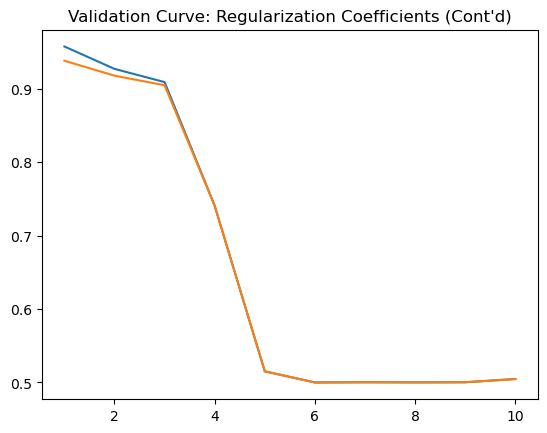

In [8]:
# Validation Curve for Testing Regularization Coefficient Ranges (Cont'd)

pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)),
        ("clf", MLPClassifier(hidden_layer_sizes=(10,))),
    ]
)

alphas = list(range(1,11))
train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__alpha",
                                                   param_range=alphas,
                                                   verbose=3,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.title("Validation Curve: Regularization Coefficients (Cont'd)")
plt.plot(alphas, train_scores_mean)
plt.plot(alphas, validation_scores_mean)

<h4><u>Findings From 'Regularization Coefficient Ranges (Cont'd)' Validation Curve</u></h4>
This plot suggests that a regularization coefficient between 1-3 is the best range for the generalization of the model. Regularization coefficients past three decrease both scores in unison.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END clf__hidden_layer_sizes=(4,);, score=(train=0.955, test=0.937) total time=  11.8s
[CV] END clf__hidden_layer_sizes=(4,);, score=(train=0.957, test=0.943) total time=  12.9s
[CV] END clf__hidden_layer_sizes=(8,);, score=(train=0.955, test=0.941) total time=  17.5s
[CV] END clf__hidden_layer_sizes=(8,);, score=(train=0.954, test=0.936) total time=  17.8s
[CV] END clf__hidden_layer_sizes=(12,);, score=(train=0.958, test=0.938) total time=  42.7s
[CV] END clf__hidden_layer_sizes=(16,);, score=(train=0.958, test=0.938) total time=  55.2s
[CV] END clf__hidden_layer_sizes=(12,);, score=(train=0.957, test=0.943) total time=  42.6s
[CV] END clf__hidden_layer_sizes=(4,);, score=(train=0.957, test=0.937) total time=  15.0s
[CV] END clf__hidden_layer_sizes=(16,);, score=(train=0.953, test=0.939) total time=  51.4s


[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:  1.2min remaining:  2.7min


[CV] END clf__hidden_layer_sizes=(20,);, score=(train=0.956, test=0.937) total time= 1.2min
[CV] END clf__hidden_layer_sizes=(24,);, score=(train=0.958, test=0.939) total time= 1.3min
[CV] END clf__hidden_layer_sizes=(8,);, score=(train=0.958, test=0.937) total time=  22.8s
[CV] END clf__hidden_layer_sizes=(20,);, score=(train=0.956, test=0.940) total time= 1.0min
[CV] END clf__hidden_layer_sizes=(4,);, score=(train=0.957, test=0.935) total time=  12.1s
[CV] END clf__hidden_layer_sizes=(12,);, score=(train=0.963, test=0.942) total time=  37.8s
[CV] END clf__hidden_layer_sizes=(24,);, score=(train=0.959, test=0.945) total time= 1.3min
[CV] END clf__hidden_layer_sizes=(8,);, score=(train=0.960, test=0.936) total time=  22.3s
[CV] END clf__hidden_layer_sizes=(16,);, score=(train=0.953, test=0.935) total time=  49.7s
[CV] END clf__hidden_layer_sizes=(12,);, score=(train=0.953, test=0.933) total time=  34.3s
[CV] END clf__hidden_layer_sizes=(4,);, score=(train=0.959, test=0.937) total time=

[Parallel(n_jobs=-1)]: Done  20 out of  30 | elapsed:  2.1min remaining:  1.0min


[CV] END clf__hidden_layer_sizes=(20,);, score=(train=0.956, test=0.934) total time= 1.1min
[CV] END clf__hidden_layer_sizes=(16,);, score=(train=0.959, test=0.938) total time=  55.3s
[CV] END clf__hidden_layer_sizes=(8,);, score=(train=0.955, test=0.935) total time=  33.7s
[CV] END clf__hidden_layer_sizes=(24,);, score=(train=0.956, test=0.936) total time= 1.3min
[CV] END clf__hidden_layer_sizes=(20,);, score=(train=0.952, test=0.932) total time=  55.6s
[CV] END clf__hidden_layer_sizes=(12,);, score=(train=0.957, test=0.936) total time=  38.6s
[CV] END clf__hidden_layer_sizes=(24,);, score=(train=0.956, test=0.933) total time= 1.0min
[CV] END clf__hidden_layer_sizes=(16,);, score=(train=0.959, test=0.938) total time=  48.7s
[CV] END clf__hidden_layer_sizes=(20,);, score=(train=0.957, test=0.935) total time=  39.5s
[CV] END clf__hidden_layer_sizes=(24,);, score=(train=0.957, test=0.934) total time=  32.4s


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.1min finished


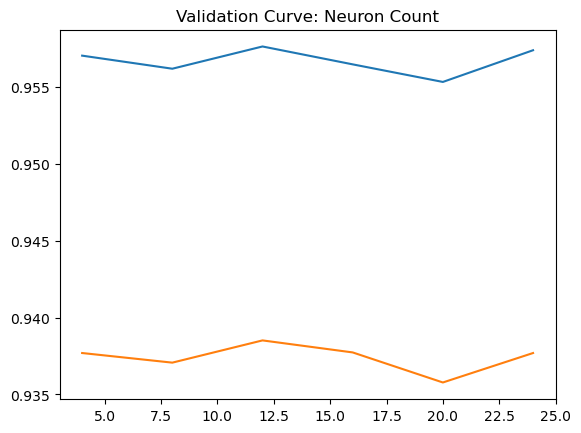

In [9]:
# Validation Curve for Testing Effect of Neuron Count

pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)),
        ("clf", MLPClassifier(alpha=1)),
    ]
)

hidden_layers = [(4,), (8,), (12,), (16,), (20,), (24,)]
neurons = list(range(4, 25, 4))
train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__hidden_layer_sizes",
                                                   param_range=hidden_layers,
                                                   verbose=3,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.title("Validation Curve: Neuron Count")
plt.plot(neurons, train_scores_mean)
plt.plot(neurons, validation_scores_mean)

<h4><u>Findings From 'Neuron Count' Validation Curve</u></h4>
The general shape of this plot suggests that regardless of the number of neurons the accuracy of both train and validation scores will remain proportional to each other. I believe this is due to the alphas value of 1 for the model. I believe these are good results and can be used in the GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END clf__hidden_layer_sizes=(14, 2);, score=(train=0.500, test=0.500) total time=  33.0s
[CV] END clf__hidden_layer_sizes=(14,);, score=(train=0.959, test=0.940) total time=  39.9s
[CV] END clf__hidden_layer_sizes=(14,);, score=(train=0.957, test=0.943) total time=  54.9s
[CV] END clf__hidden_layer_sizes=(14, 2);, score=(train=0.995, test=0.951) total time= 1.6min
[CV] END clf__hidden_layer_sizes=(14,);, score=(train=0.958, test=0.935) total time=  47.5s
[CV] END clf__hidden_layer_sizes=(14, 5);, score=(train=0.996, test=0.952) total time= 1.9min
[CV] END clf__hidden_layer_sizes=(14, 3);, score=(train=0.996, test=0.954) total time= 2.1min
[CV] END clf__hidden_layer_sizes=(14, 5);, score=(train=0.996, test=0.954) total time= 1.5min


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  2.2min remaining:  4.7min


[CV] END clf__hidden_layer_sizes=(14, 3);, score=(train=0.996, test=0.952) total time= 2.2min
[CV] END clf__hidden_layer_sizes=(14, 4);, score=(train=0.996, test=0.954) total time= 1.8min
[CV] END clf__hidden_layer_sizes=(14, 2);, score=(train=0.500, test=0.500) total time=  26.5s
[CV] END clf__hidden_layer_sizes=(14,);, score=(train=0.958, test=0.935) total time=  47.8s
[CV] END clf__hidden_layer_sizes=(14, 2);, score=(train=0.995, test=0.951) total time= 1.4min
[CV] END clf__hidden_layer_sizes=(14, 4);, score=(train=0.500, test=0.500) total time=  29.9s
[CV] END clf__hidden_layer_sizes=(14, 3);, score=(train=0.996, test=0.950) total time= 1.6min
[CV] END clf__hidden_layer_sizes=(14, 2);, score=(train=0.500, test=0.500) total time=  27.6s
[CV] END clf__hidden_layer_sizes=(14,);, score=(train=0.959, test=0.936) total time=  52.7s


[Parallel(n_jobs=-1)]: Done  17 out of  25 | elapsed:  4.0min remaining:  1.9min


[CV] END clf__hidden_layer_sizes=(14, 4);, score=(train=0.996, test=0.951) total time= 4.2min
[CV] END clf__hidden_layer_sizes=(14, 4);, score=(train=0.996, test=0.951) total time= 2.7min
[CV] END clf__hidden_layer_sizes=(14, 5);, score=(train=0.996, test=0.954) total time= 1.9min
[CV] END clf__hidden_layer_sizes=(14, 3);, score=(train=0.995, test=0.954) total time= 1.6min
[CV] END clf__hidden_layer_sizes=(14, 4);, score=(train=0.995, test=0.953) total time= 1.3min
[CV] END clf__hidden_layer_sizes=(14, 5);, score=(train=0.996, test=0.951) total time= 3.0min
[CV] END clf__hidden_layer_sizes=(14, 3);, score=(train=0.996, test=0.954) total time= 2.9min
[CV] END clf__hidden_layer_sizes=(14, 5);, score=(train=0.995, test=0.954) total time= 1.3min


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.4min finished


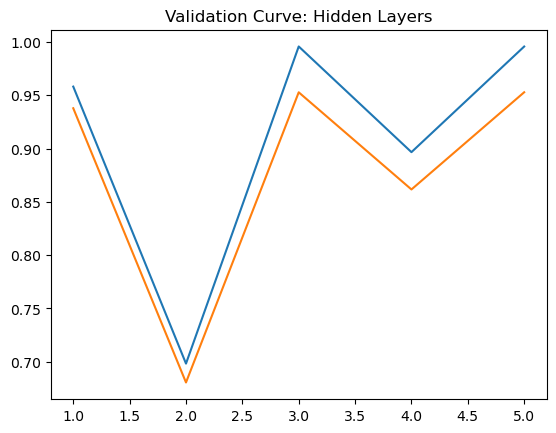

In [10]:
# Validation Curve for Testing Effect of Adding Hidden Layers

pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)),
        ("clf", MLPClassifier(alpha=1, max_iter=500)),
    ]
)

hidden_layers_sizes = [(14,), (14,2), (14,3), (14,4), (14,5)]
hidden_layers = list(range(1,6))
train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__hidden_layer_sizes",
                                                   param_range=hidden_layers_sizes,
                                                   verbose=3,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.title("Validation Curve: Hidden Layers")
plt.plot(hidden_layers, train_scores_mean)
plt.plot(hidden_layers, validation_scores_mean)

<h4><u>Findings From 'Hidden Layers' Validation Curve</u></h4>
The shape of this plot suggest that adding hidden layers to the MLPClassifier object does not improve the generalization of the model. Two hidden layer makes the train score shoot up to 1 while barely increasing the validation score which suggest overfitting. From three hidden layers and beyond, both the training and the validation scores are completely parallel to each other which suggests that the generalization will remain the same at that point. Therefore, adding another hidden layer will have a detrimental effect on the generalization of the MLPClassifier.

<h3><strong><u>Cross Validation Testing</u></strong></h3>

In [11]:
pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)),
        ("clf", MLPClassifier(max_iter=1000)),
    ]
)
param_grid = {
    "clf__hidden_layer_sizes": [(2,), (4,), (6,), (8,), (10,), (12,), (14,), (16,), (18,), (20,)],
    "clf__alpha": list(range(1,4))
    }

model = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)
model.fit(X_train, y_train)
mlp_classifier = model.best_estimator_
model.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END clf__alpha=1, clf__hidden_layer_sizes=(2,);, score=0.937 total time=   7.2s
[CV 2/5] END clf__alpha=1, clf__hidden_layer_sizes=(2,);, score=0.944 total time=   7.5s
[CV 4/5] END clf__alpha=1, clf__hidden_layer_sizes=(2,);, score=0.934 total time=   7.5s
[CV 5/5] END clf__alpha=1, clf__hidden_layer_sizes=(2,);, score=0.938 total time=   7.5s
[CV 3/5] END clf__alpha=1, clf__hidden_layer_sizes=(2,);, score=0.937 total time=   8.0s
[CV 1/5] END clf__alpha=1, clf__hidden_layer_sizes=(4,);, score=0.937 total time=   9.3s
[CV 2/5] END clf__alpha=1, clf__hidden_layer_sizes=(4,);, score=0.944 total time=  10.3s
[CV 3/5] END clf__alpha=1, clf__hidden_layer_sizes=(4,);, score=0.938 total time=  11.4s
[CV 5/5] END clf__alpha=1, clf__hidden_layer_sizes=(4,);, score=0.936 total time=   9.9s
[CV 4/5] END clf__alpha=1, clf__hidden_layer_sizes=(4,);, score=0.934 total time=  10.4s
[CV 2/5] END clf__alpha=1, clf__hidden_layer_siz

{'clf__alpha': 1, 'clf__hidden_layer_sizes': (6,)}

<h3><strong><u>Learning Curve</u></strong></h4>

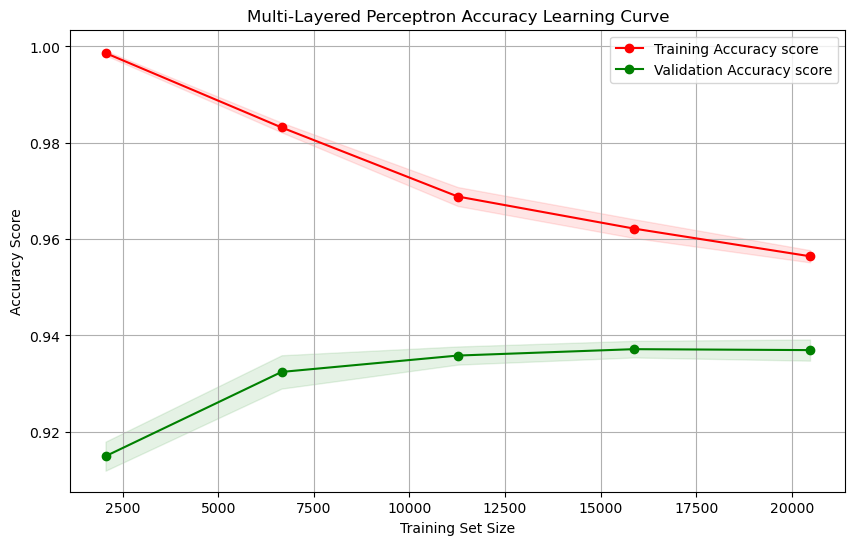

In [ ]:
mlp_train_sizes, mlp_train_scores, mlp_validation_scores = learning_curve(
    mlp_classifier,
    X_train,
    y_train,
    cv=5,  # Number of folds for cross-validation
    scoring='accuracy',  # Metric to evaluate the model
    n_jobs=-1,  # Use all available CPU cores
)

# Calculate mean and standard deviation for scores
mlp_train_scores_mean = np.mean(mlp_train_scores, axis=1)
mlp_train_scores_std = np.std(mlp_train_scores, axis=1)
mlp_validation_scores_mean = np.mean(mlp_validation_scores, axis=1)
mlp_validation_scores_std = np.std(mlp_validation_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Multi-Layered Perceptron Accuracy Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.grid()

plt.fill_between(mlp_train_sizes, mlp_train_scores_mean - mlp_train_scores_std,
                mlp_train_scores_mean + mlp_train_scores_std, alpha=0.1, color="r")
plt.fill_between(mlp_train_sizes, mlp_validation_scores_mean - mlp_validation_scores_std,
                mlp_validation_scores_mean + mlp_validation_scores_std, alpha=0.1, color="g")
plt.plot(mlp_train_sizes, mlp_train_scores_mean, 'o-', color="r",
            label="Training Accuracy score")
plt.plot(mlp_train_sizes, mlp_validation_scores_mean, 'o-', color="g",
            label="Validation Accuracy score")

plt.legend(loc="best")
plt.show()

<h4><u>Findings From Learning Curve</u></h4>
I believe that the overall shape of the learning curve is good. The training and the validation curves are diverging towards each other which suggests that the model is prioritizing the general logic of the dataset over being completely accurate. This MLP model is a good model to move forward with for the final cross-validation test for the three chosen classifiers.

<h2><strong><u>Metrics</u></strong></h2>

<h3><u>MLP Training Metrics</u></h3>

In [12]:
mlp_training_values = cross_val_score(mlp_classifier, X_train, y_train, scoring='accuracy', cv=5)
print("Cross-validation Accuracy training scores: ", mlp_training_values)
np_mlp_training_values = np.array(mlp_training_values)
average = np.mean(np_mlp_training_values)
stDev = np.std(np_mlp_training_values)
print(average.round(2), " +/- ", stDev.round(4), "\n")

Cross-validation Accuracy training scores:  [0.93554688 0.93886719 0.93613281 0.93457031 0.93359375]
0.94  +/-  0.0018 



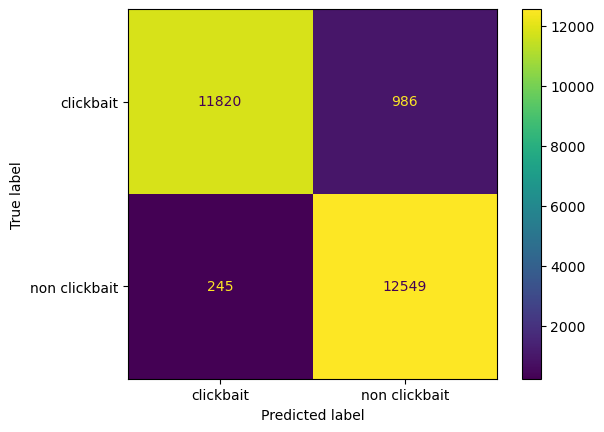

In [13]:
#Training Confusion Matrix
ConfusionMatrixDisplay.from_estimator(mlp_classifier, X_train, y_train)

<h3><u>MLP Testing Metrics</u></h3>

In [17]:
mlp_test_predictions = mlp_classifier.predict(X_test)

mlp_test_accuracy = accuracy_score(y_test, mlp_test_predictions)
print("Multi-layer Perceptron Test Accuracy: {:.2f}%".format(mlp_test_accuracy * 100))

Multi-layer Perceptron Test Accuracy: 93.97%


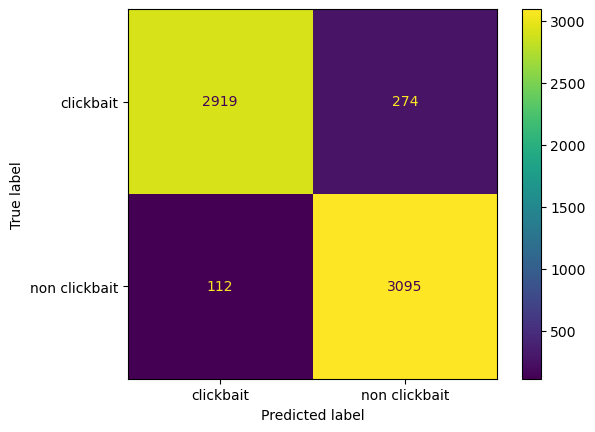

Exception ignored in: <function ResourceTracker.__del__ at 0x103569bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104231bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106c7dbc0>
Traceback (most recent call last

In [18]:
#Testing Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, mlp_test_predictions)